<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/Python/answer/09a_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第9章 深層学習


## 課題1

畳み込みネットワークにおいて、使用するデータをCIFER10 (https://keras.io/ja/datasets/) に変更し、いくつかのネットワーク構造について認識・評価を行ってください。

## 準備

必要なライブラリ等を読み込みます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

CIFER10は画像認識用のデータセットです。10種類のカテゴリの画像が含まれています。

In [2]:
cf10 = keras.datasets.cifar10
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

学習用データは50000枚の32x32画像で、カラーなので3チャンネルからなります。

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
target_names =['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

学習用データからランダムに25枚を表示します。

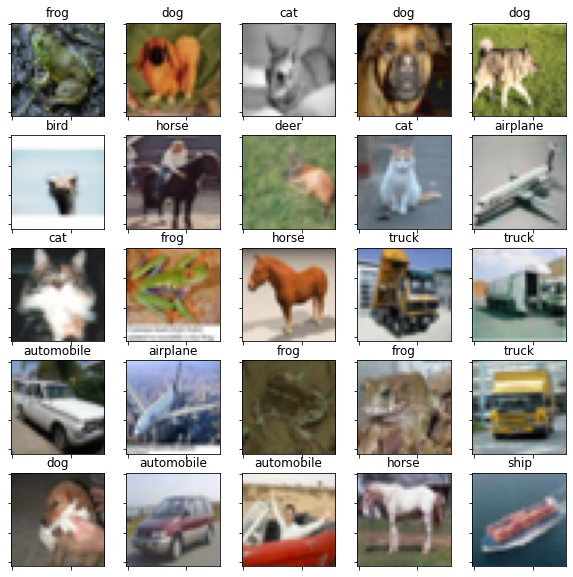

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    rand_num = np.random.randint(0,X_train.shape[0])
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[rand_num])
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.title(target_names[y_train[rand_num][0]])
plt.show()

入力値を0～1に、出力をone-hotベクトルにします。

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

単純なCNNで認識してみます。

In [7]:
model1 = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               147584    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [8]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model1.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
391/391 [==============================] - 20s 51ms/step - loss: 1.8236 - accuracy: 0.3330
Epoch 2/5
391/391 [==============================] - 25s 63ms/step - loss: 1.2950 - accuracy: 0.5422
Epoch 3/5
391/391 [==============================] - 25s 63ms/step - loss: 1.1555 - accuracy: 0.5942
Epoch 4/5
391/391 [==============================] - 25s 63ms/step - loss: 1.0561 - accuracy: 0.6343
Epoch 5/5
391/391 [==============================] - 25s 64ms/step - loss: 0.9641 - accuracy: 0.6666


In [10]:
test_loss, test_acc = model1.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 1.0251 - accuracy: 0.6463
Test accuracy: 0.6463000178337097


バッチ標準化とドロップアウトを入れてみます。ドロップアウトでは半数のユニットが消えているので、epochは倍の回数をとります。

In [11]:
model2 = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 6, 32)          128       
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [12]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, epochs=10, batch_size=200)

Epoch 1/10
250/250 [==============================] - 23s 91ms/step - loss: 1.8452 - accuracy: 0.3457
Epoch 2/10
250/250 [==============================] - 23s 92ms/step - loss: 1.2961 - accuracy: 0.5380
Epoch 3/10
250/250 [==============================] - 23s 92ms/step - loss: 1.1442 - accuracy: 0.5934
Epoch 4/10
250/250 [==============================] - 23s 92ms/step - loss: 1.0585 - accuracy: 0.6271
Epoch 5/10
250/250 [==============================] - 24s 94ms/step - loss: 0.9898 - accuracy: 0.6507
Epoch 6/10
250/250 [==============================] - 23s 93ms/step - loss: 0.9152 - accuracy: 0.6786
Epoch 7/10
250/250 [==============================] - 24s 96ms/step - loss: 0.8866 - accuracy: 0.6859
Epoch 8/10
250/250 [==============================] - 23s 93ms/step - loss: 0.8458 - accuracy: 0.7019
Epoch 9/10
250/250 [==============================] - 23s 92ms/step - loss: 0.8058 - accuracy: 0.7170
Epoch 10/10
250/250 [==============================] - 23s 92ms/step - loss: 0.789

In [13]:
test_loss, test_acc = model2.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.9354 - accuracy: 0.6714
Test accuracy: 0.6714000105857849


## 課題2

リカレントニューラルネットワークにおいて、使用するデータをロイターのニュースワイヤーに変更し、いくつかのネットワーク構造について認識・評価を行ってください。

In [14]:
max_features = 10000
maxlen = 50
(X_train, y_train), (X_test, y_test) = keras.datasets.reuters.load_data(num_words=max_features)
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

C:\Users\araki\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\araki\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


単語インデックスを単語に戻して、元のデータを確認します。インデックスは"padding", "start of sequence","unknown"にそれぞれ0,1,2が割り当てられているので、3つずらして対応させます。

In [15]:
word_index = keras.datasets.reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])
decoded_review

'company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [16]:
y_train = keras.utils.to_categorical(y_train, 46)
y_test = keras.utils.to_categorical(y_test, 46)


単純なRNNを構成して学習させます。

In [17]:
model3 = keras.Sequential([
    keras.layers.Embedding(max_features, 128),
    keras.layers.SimpleRNN(64),
    keras.layers.Dense(46, activation='softmax')
]) 
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                12352     
_________________________________________________________________
dense_4 (Dense)              (None, 46)                2990      
Total params: 1,295,342
Trainable params: 1,295,342
Non-trainable params: 0
_________________________________________________________________


In [18]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model3.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
225/225 [==============================] - 7s 24ms/step - loss: 2.7319 - acc: 0.3331 - val_loss: 2.0397 - val_acc: 0.4146
Epoch 2/5
225/225 [==============================] - 5s 20ms/step - loss: 1.7179 - acc: 0.5483 - val_loss: 1.7512 - val_acc: 0.5526
Epoch 3/5
225/225 [==============================] - 5s 21ms/step - loss: 1.2253 - acc: 0.7026 - val_loss: 1.8838 - val_acc: 0.5142
Epoch 4/5
225/225 [==============================] - 5s 21ms/step - loss: 0.8360 - acc: 0.8036 - val_loss: 1.9748 - val_acc: 0.5270
Epoch 5/5
225/225 [==============================] - 5s 21ms/step - loss: 0.5510 - acc: 0.8891 - val_loss: 2.0212 - val_acc: 0.5359


In [19]:
test_loss, test_acc = model3.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

71/71 [==============================] - 0s 3ms/step - loss: 2.0044 - acc: 0.5387
Test accuracy: 0.5387355089187622


bi-LSTMに変更します。

In [20]:
model4 = keras.Sequential([
    keras.layers.Embedding(max_features, 128),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(46, activation='softmax')
]) 
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense_5 (Dense)              (None, 46)                5934      
Total params: 1,384,750
Trainable params: 1,384,750
Non-trainable params: 0
_________________________________________________________________


In [21]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model4.fit(X_train, y_train, epochs=5, batch_size=32,validation_split=0.2)

Epoch 1/5
225/225 [==============================] - 12s 39ms/step - loss: 2.5073 - acc: 0.4001 - val_loss: 1.7381 - val_acc: 0.5342
Epoch 2/5
225/225 [==============================] - 8s 36ms/step - loss: 1.6176 - acc: 0.5743 - val_loss: 1.6524 - val_acc: 0.5593
Epoch 3/5
225/225 [==============================] - 8s 36ms/step - loss: 1.3988 - acc: 0.6392 - val_loss: 1.4954 - val_acc: 0.6216
Epoch 4/5
225/225 [==============================] - 8s 36ms/step - loss: 1.1018 - acc: 0.7131 - val_loss: 1.3767 - val_acc: 0.6511
Epoch 5/5
225/225 [==============================] - 8s 36ms/step - loss: 0.7905 - acc: 0.7996 - val_loss: 1.4438 - val_acc: 0.6461


In [22]:
test_loss, test_acc = model4.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

71/71 [==============================] - 1s 8ms/step - loss: 1.5042 - acc: 0.6309
Test accuracy: 0.6308993697166443
